In [3]:
import os
os.chdir("..")

In [4]:
from torch.utils.data import DataSet
import numpy as np
from umap import umap_
import cv2
import matplotlib.pyplot as plt
import tqdm

c:\Users\angelo\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\angelo\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\angelo\AppData\Local\Programs\Python\Pyth

In [ ]:
class ImagePairDataset(DataSet):
    def __init__(self, datadir):
        self.datadir = os.getcwd() + datadir
        self.filenames = os.listdir(datadir + "\\first")

    def __getitem__(self):
        pass

    def __len__(self):
        return len(self.filenames)

In [21]:
def train_dists(data, n_samples=10000, dataset="train", plot_same=False):
    ones = []
    zeros = []
    indices = np.arange(0, 90638)
    np.random.shuffle(indices)
    indices = indices[:n_samples]
    label = None
    
    for image_idx in tqdm.tqdm(indices):
        image1 = cv2.imread(f"data\\{dataset}\\first\\{image_idx}_1.jpg")
        if image1 is not None:
            label = 1
            image2 = cv2.imread(f"data\\{dataset}\\second\\{image_idx}_1.jpg")
            if image2 is None:
                continue
        else:
            image1 = cv2.imread(f"data\\{dataset}\\first\\{image_idx}_0.jpg")
            if image1 is None:
                continue
            label = 0
            image2 = cv2.imread(f"data\\{dataset}\\second\\{image_idx}_0.jpg")
            if image2 is None:
                continue

        image1 = cv2.resize(image1, (256, 256))
        image2 = cv2.resize(image2, (256, 256))

        dist = np.linalg.norm(image1 - image2)
        if label == 0:
            zeros.append(dist)
        else:
            ones.append(dist)

        if label == 1 and dist > 20000 and plot_same:
            fig, axes = plt.subplots(1, 2)
            axes[0].imshow(image1, cmap='gray')
            axes[0].axis('off')
            axes[1].imshow(image2, cmap='gray')
            axes[1].axis('off')

    return zeros, ones

100%|██████████| 10/10 [00:00<00:00, 20.27it/s]


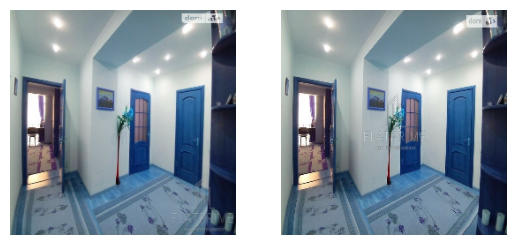

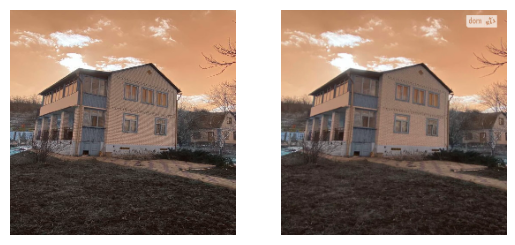

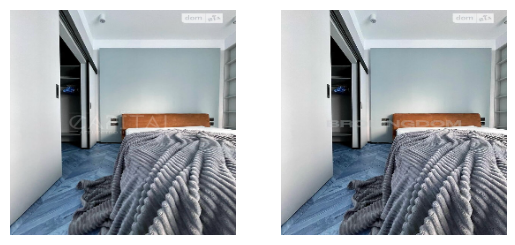

In [25]:
zeros, ones = train_dists(10, plot_same=True)

In [28]:
def plot_dist_distr(zeros, ones):
    bin_edges = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000]
    plt.hist(zeros, bins=bin_edges, color='blue', alpha=0.7, label='Different images')
    plt.hist(ones, bins=bin_edges, color='green', alpha=0.7, label='Same images')

    plt.xlabel('Distance')
    plt.ylabel('Count')
    plt.title('Countplots of Distances')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

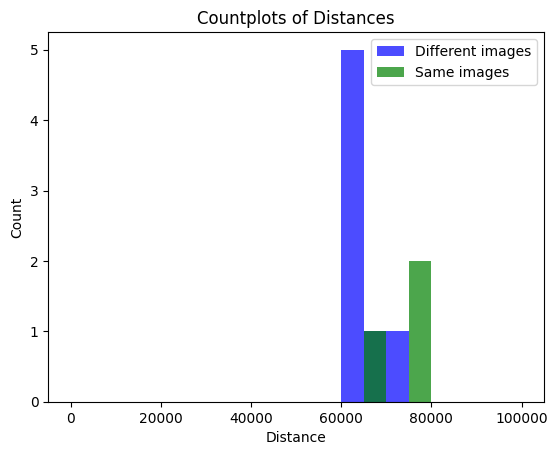

In [29]:
plot_dist_distr(zeros, ones)

In [30]:
zeros, ones = train_dists()

100%|██████████| 10000/10000 [04:16<00:00, 38.95it/s]


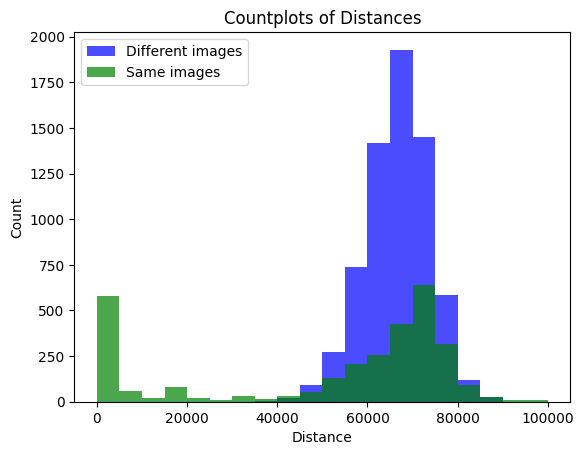

In [31]:
plot_dist_distr(zeros, ones)